In [ ]:
import numpy as np
from scipy import optimize

# 1 задача


In [217]:
from scipy.optimize import minimize
import numpy as np
from matplotlib import pyplot as plt

In [218]:
def dist(z1, z2):
  r = ((z1[0] - z2[0]) ** 2 + (z1[1] - z2[1]) ** 2) ** (1/2)
  return r

z1 = np.array([2, 5])
z2 = np.array([1, 9])
z3 = np.array([-2, 4])
z4 = np.array([-3, 0])

# найдем центр окружности

def distance(z):
  s = dist(z1, z) ** 2 + dist(z2, z) ** 2 + dist(z3, z) ** 2 + dist(z4, z) ** 2
  return s


center = minimize(distance, np.array([0, 3]))
print(center)


      fun: 58.000000000000014
 hess_inv: array([[0.9125021 , 0.26249721],
       [0.26249721, 0.2124979 ]])
      jac: array([-9.53674316e-07, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-0.49999997,  4.5       ])


In [219]:
#найдем радиус

def radius(r):
  center = minimize(distance, np.array([0, 3]))
  s = (dist(z1, center.x) - r) ** 2 + (dist(z2, center.x) - r) ** 2 + (dist(z3, center.x) - r) ** 2 + (dist(z4, center.x) - r) ** 2
  return s

rad = minimize(radius, 4)
print(rad)

      fun: 8.846719249719603
 hess_inv: array([[1]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([3.50547004])


# 2 задача


Метод Ньютона:
$z_{n+1} = z_n -\frac{f(z_n)}{f'(z_n)}$

Корни уравнения $12 x^2-66 x +18 = 0$:
$$
x_1 = \frac{11-\sqrt{57}}{4} \approx 0.29
$$

$$
x_2 = \frac{11+\sqrt{57}}{4} \approx 5.21
$$

Происходят три перемены знака функции между корнями уравнения, поэтому уравнение $4 x^3-33 x^2 +18x +11 = 0$ имеет три действительных корня, которые заключены в следующих промежутках $\sim [-1, 0.29]; [0.29, 5.21]; [5.21, 7]$. Определим корни уравнения и по ним аналогичным образом определим приблизительные значения для нахождения корней исходной функции.

In [ ]:
def f(x):
  return (x**4-11*x**3+9*x**2+11*x-10)

def f1(x):
  return 4*x**3 - 33*x**2 + 18*x + 11

def f2(x):
  return 12*x**2 - 66*x + 18

x0 = [0, 1, 5.5]
optimize.newton(f1, x0, fprime=lambda x: 12*x**2 - 66*x + 18)

array([-0.36130468,  1.        ,  7.61130468])

In [ ]:
x0 = [-1, 0.5, 3, 8]
optimize.newton(f, x0, fprime=lambda x: 4*x**3 - 33*x**2 + 18*x + 11, fprime2=lambda x: 12*x**2 - 66*x + 18)

array([-1.,  1.,  1., 10.])

Наибольшее по модулю - число 10. Перебором точек, найдем число, начиная с которого можно приблизиться к корню.

In [ ]:
n = 100
z = 10
z_i = z
z_n = z


while z_n == 10:
  z_i -= 0.1
  z_n = z_i
  for i in range(n):
    z_n = z_n - f(z_n)/f1(z_n)
    i+=1

print(z_i)

7.6000000000000085


Получили, что точка, начиная с которой можно приблизиться к корню - 7.6.

Точки пересечения окружностей $x^2+y^2=100$; $(x-10)^2 + y^2 = (10-7.6)^2$: $$
(x,y) = (\frac{1214}{125}, \pm \frac{24 \sqrt{154}}{125}).
$$

Площадь сектора: $s = \pi (10-7.6)^2 \cdot 2 \cdot arctg(\frac{2\sqrt{154}}{3})$

In [ ]:
S = 3.14*10**2
s = 3.14*(10-z_i)**2 * 2.9
print(s/S)


0.16703999999999883


# 3 задача

In [248]:
import numpy as np
import numpy.linalg as la

n = 10
A = np.random.normal(size=(n,n))
la.matrix_rank(A)

10

In [253]:
A_std = StandardScaler().fit_transform(A)
rank_std = la.matrix_rank(A_std)
u, s, vh = np.linalg.svd(A_std)
print(rank_std)
print()

for rank in range(0, rank_std + 1, 1):
  Ar = u[:,:rank] @ np.diag(s[:rank]) @ vh[:rank,:]
  err = np.linalg.norm(A_std - Ar)/np.linalg.norm(A_std)
  print(err)

9

1.0
0.8725392934408597
0.7374111165179155
0.5994991702743607
0.4744228506609468
0.34889681347776186
0.24673589120999945
0.14995280413820314
0.09557451169347159
9.922572184933342e-16


Относительная ошибка тем меньше, чем ближе ранг приближенной матрицы к исходной. То есть наилучшее приближение матрицей, ранг которой равен рангу исходной. 

Требуется количество слагаемых, равных рангу исходной матрицы, чтобы приближение было точным.

Искомые наборы векторов будут левые и правые сингулярные векторы:



In [250]:
print(u)
print()
print(vh.T)

[[-0.05683401 -0.16102274 -0.35693416  0.47813433  0.44229479  0.47427508
  -0.27952118  0.09574153 -0.08346903 -0.31622777]
 [-0.16693067 -0.13648405 -0.28730184  0.32883658  0.06483638 -0.46756682
   0.59280405 -0.09236309  0.28294935 -0.31622777]
 [-0.04843056  0.39917147  0.44878825 -0.03500247  0.35079609  0.09790386
  -0.05770862 -0.53679551  0.33400267 -0.31622777]
 [-0.0121923  -0.30250988  0.22873099 -0.23661183 -0.27184343  0.58812059
   0.4017871   0.22041715  0.26501854 -0.31622777]
 [ 0.1479188  -0.32398957 -0.24445499 -0.24881992 -0.25681066 -0.22550279
  -0.56482931 -0.12631606  0.44686695 -0.31622777]
 [ 0.77920066 -0.05707232  0.23334862 -0.01249928  0.25849121 -0.22971237
   0.08124784  0.2688662  -0.19106426 -0.31622777]
 [-0.46231923 -0.39424806  0.2047475  -0.36050547  0.23771253 -0.2121918
  -0.05400927 -0.05971609 -0.50092719 -0.31622777]
 [ 0.0720686   0.03980094  0.16129654  0.43684255 -0.62528458  0.03159725
  -0.06670468 -0.33483925 -0.40966813 -0.31622777]
 

# 4 задача

In [230]:
import skimage
from sklearn.datasets import load_digits
from skimage import data
from skimage.color import rgb2gray
from skimage import img_as_float
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from numpy.linalg import svd

import numpy as np

digits = load_digits()
A = digits.data
y = digits.target


<Figure size 432x288 with 0 Axes>

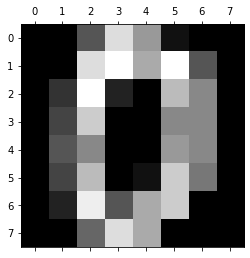

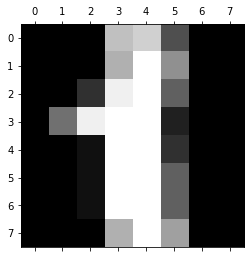

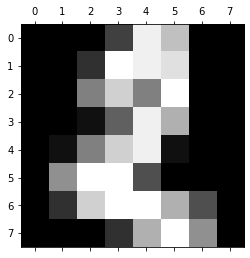

In [231]:
from sklearn.datasets import load_digits
digits = load_digits()

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.matshow(digits.images[1])
plt.matshow(digits.images[2])

plt.show()

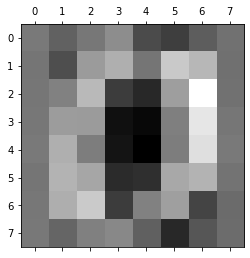

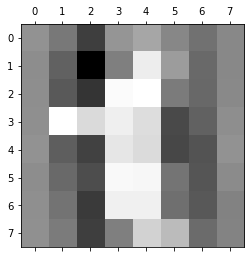

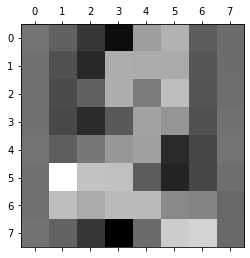

In [232]:
# сжатие изображения

A_std = StandardScaler().fit_transform(A)
for i in range(3):
    B = A_std[i,:].reshape((8,8))
    plt.matshow(B) 
    plt.show()   

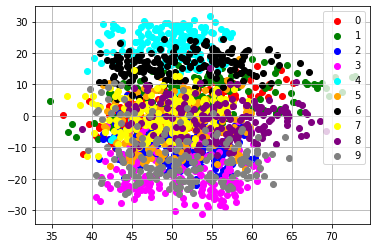

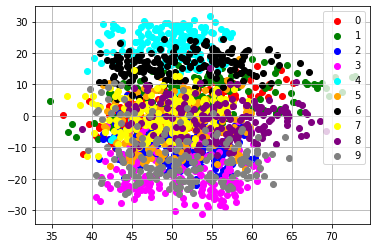

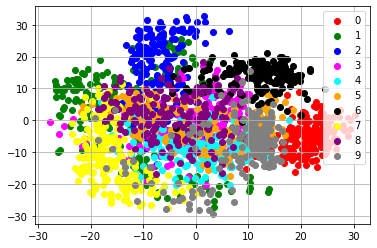

[2.19311934e+03 5.66996772e+02 5.42004933e+02 5.04151698e+02
 4.25592965e+02 3.53218247e+02 3.20375836e+02 3.02074410e+02
 2.79556965e+02 2.68519447e+02 2.28655772e+02 2.24164792e+02
 2.07596162e+02 1.97012043e+02 1.85787554e+02 1.74752715e+02
 1.70848098e+02 1.65449993e+02 1.48269096e+02 1.44935033e+02
 1.39338512e+02 1.31353596e+02 1.28811234e+02 1.24956439e+02
 1.22626879e+02 1.13641741e+02 1.11491973e+02 1.05780464e+02
 1.02878367e+02 9.62352840e+01 8.98289035e+01 8.74773113e+01
 8.52859082e+01 8.41569661e+01 8.17434756e+01 7.96523042e+01
 7.44591794e+01 7.01282195e+01 6.92870296e+01 6.76558862e+01
 6.40372216e+01 5.85316341e+01 5.72023947e+01 5.51081060e+01
 5.01873563e+01 4.81843274e+01 4.56233630e+01 4.08978459e+01
 3.47662028e+01 2.95553759e+01 2.12903169e+01 1.33451127e+01
 1.06721173e+01 1.04453654e+01 8.44043069e+00 5.18228232e+00
 3.90282339e+00 2.55304237e+00 1.51483902e+00 1.08981649e+00
 8.60513674e-01 1.83101880e-13 1.83101880e-13 1.81701891e-13]


In [235]:
labels = y

numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]        
colors = ['red', 'green', 'blue', 'magenta', 'cyan', 'orange', 'black', 'yellow', 'purple', 'gray']

def inspect_projections(projections):           
    for label, colour in zip(numbers, colors):
        plt.scatter(projections[labels == label, 0],
                    projections[labels == label, 1],
                    label = label, c = colour)
    plt.legend(loc='best')
    plt.grid()
    plt.show()


rank = 2
u, s, wh = np.linalg.svd(A)
projections = u[:,:rank] @ np.diag(s[:rank])
inspect_projections(projections)

rank = 20
u, s, wh = np.linalg.svd(A)
projections = u[:,:rank] @ np.diag(s[:rank])
inspect_projections(projections)


rank = 20
u, s, wh = np.linalg.svd(A)
projections = u[:,2:rank+2] @ np.diag(s[2:rank+2])
inspect_projections(projections)
print(s)

# 5 задача


In [ ]:
lamb = np.array([0.5, 0.4])

k=[]


def Probability(m, k):
  p_lamb = np.array([0.5, 0.5])
  i=0
 
  for i in range(m):
    
    if k[i] == 1:
      p_m_l = lamb
      p_lamb = p_m_l * p_lamb / (p_lamb[0] * lamb[0] + p_lamb[1] * lamb[1])
    
    elif k[i] == 0:
      p_m_l = 1 - lamb
      p_lamb = p_m_l * p_lamb / (p_lamb[0] * (1-lamb[0]) + p_lamb[1] * (1-lamb[1]))

    i+=1

  return p_lamb

m = 5
k = [1, 1, 0, 1, 0]

Probability(m, k)

array([0.57561245, 0.42438755])

In [ ]:
def search(m, k):
  if Probability(m, k)[0] > Probability(m, k)[1]:
    p = 1 # монета настоящая 
  
  elif Probability(m, k)[0] < Probability(m, k)[1]:
    p = 0 # монета шулерская

  return p

In [209]:
#шулерские

n=10
m = 5
y_pred_f = np.array([])
for i in range(n):
  toss_ups = np.random.choice([0,1], size=m, p=[0.6, 0.4]) # p - показывает вероятность, с которой мы хотим добавить число в массив
  print(toss_ups)
  y_pred_f = np.append(y_pred_f, search(m, toss_ups))
  i+=1

y_pred_f

[0 0 0 0 0]
[1 0 0 0 1]
[1 1 0 0 0]
[0 0 0 0 1]
[0 0 1 1 0]
[1 1 0 1 0]
[1 1 0 0 1]
[0 1 0 0 0]
[0 0 0 1 0]
[1 1 0 0 1]


array([0., 0., 0., 0., 0., 1., 1., 0., 0., 1.])

In [210]:
#настоящие
m = 5
y_pred_t = np.array([])
for i in range(n):
  toss_ups = np.random.choice([0,1], size=m, p=[0.5, 0.5])
  print(toss_ups)
  y_pred_t = np.append(y_pred_t, search(m, toss_ups))
  i+=1

y_pred_t

[0 0 0 0 0]
[0 0 1 1 1]
[1 0 1 0 1]
[1 1 0 0 1]
[1 1 1 1 1]
[1 0 1 1 1]
[1 1 1 1 1]
[1 1 0 0 1]
[1 1 0 1 1]
[1 1 0 0 0]


array([0., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

In [237]:
from sklearn.metrics import confusion_matrix

n = 10
y_pred = np.concatenate([y_pred_t, y_pred_f]) # сначала подбрасываем n настоящих, потом n шулерских монет
y_actu = np.ones(2*n)
y_actu[n:] = 0

conf_m = confusion_matrix(y_actu, y_pred)
conf_m / conf_m.astype(np.float64).sum(axis=1)

array([[0.7, 0.3],
       [0.2, 0.8]])

In [ ]:
P = conf_m[0,0] + conf_m[1,0]
N = conf_m[0,1] + conf_m[1,1]
TP = conf_m[0,0]
FP = conf_m[0,1]
FN = conf_m[1,0]
TN = conf_m[1,1]


accuracy = (TP + TN)/(P+N)
error_rate = 1-accuracy
FPR = FP/N
TPR = TP/P
precision = TP/(TP+FP)
recall = TP/P
F_measure = 2/(1/precision + 1/recall)

F_measure 

0.6956521739130435

Построим график F - меры.

In [ ]:
#шулерские

def false_coins(n, m):
  y_pred_f = np.array([])
  for i in range(n):
    toss_ups = np.random.choice([0,1], size=m, p=[0.6, 0.4])
    y_pred_f = np.append(y_pred_f, search(m, toss_ups))
    i+=1
  return y_pred_f

#настоящие

def true_coins(n, m):
  y_pred_t = np.array([])
  for i in range(n):
    toss_ups = np.random.choice([0,1], size=m, p=[0.5, 0.5])
    y_pred_t = np.append(y_pred_t, search(m, toss_ups))
    i+=1
  return y_pred_t



In [ ]:
#confusion_matrix

def conf_matr(n, m):
  y_pred = np.concatenate([true_coins(n, m), false_coins(n, m)])
  y_actu = np.ones(2*n)
  y_actu[n:] = 0

  c = confusion_matrix(y_actu, y_pred)
  #matr = c / c.astype(np.float64).sum(axis=1)
  return c


In [ ]:
def F_measure(n, m):
  TP = conf_matr(n, m)[0,0]
  FP = conf_matr(n, m)[0,1]
  FN = conf_matr(n, m)[1,0]
  TN = conf_matr(n, m)[1,1]
  P = TP + FN
  N = TN + FP


  precision = TP/(TP+FP)
  recall = TP/P
  F_measure = 2/(1/precision + 1/recall)
  #print(conf_matr(n,m))
  #print(precision)
  #print(recall)

  return F_measure


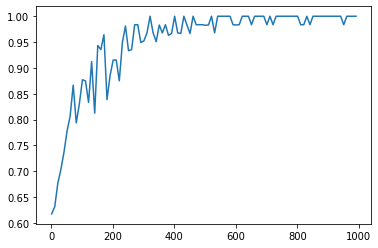

In [ ]:
x = np.arange(1, 1000, 10)
y = []
n = 30
for i in range(100):
  m = x[i]
  y.append(F_measure(n, int(m)))
  i += 1
  #print(m)
  #print(y)

plt.plot(x, y)
plt.show()